In [42]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from matplotlib.pyplot import imshow
%matplotlib inline

In [43]:
model = VGG16(weights='imagenet', include_top=False)

In [44]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.engine import Input

In [45]:
input_shape = (224, 224, 3)

In [46]:
#custom_model is the model architecture for VGG16 model
custom_model = Sequential([
    Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
           activation='relu'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2))
])

In [53]:
#prepare our input image to match input shape
img_path = 'mona.jpg'
img = image.load_img(img_path, target_size = (224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

In [58]:
# We only visualize image after passing it to the first convolution layer and relu layer
# So we create a new test_model_1 with only the first two layers and assign them the weights from 
# pretrained imagenet weights
test_model_1 = Sequential()
test_model_1.add(Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', weights=model.layers[1].get_weights()))
test_model_1.add(Conv2D(64, (3, 3), activation='relu', padding='same', weights=model.layers[2].get_weights()))
    
predict_1 = test_model_1.predict(x)

In [55]:
# rearrange the shape after passing through first two layers
image_array = np.transpose(predict_1, (0,3,1,2))[0]

In [56]:
#combine all 64 images to one single image
for j in range(8):
    for i in range(8):
        if i == 0:
            temprow = image_array[8*j]
        else:
            temprow = np.concatenate((temprow, image_array[(8*j)+i]), axis=1)
    if j == 0:
        temp = temprow
    else:
        temp = np.concatenate((temp, temprow), axis=0)

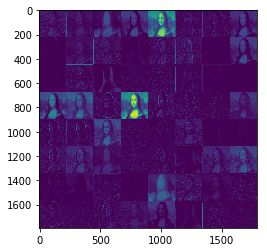

In [57]:
imshow(temp)